In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [2]:
data = pd.read_csv('../data/insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(1)

In [9]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [13]:
#Encoding sex and smoker
data.loc[:, 'sex_num'] = data['sex'].map({'male': 1, 'female': 0})
data.loc[:, 'smoker_num'] = data['smoker'].map({'yes': 1, 'no': 0})


In [ ]:
#for encoding without SettingWithCopyWarning we could also do:
# #data = data.copy()

#data['sex_num'] = data['sex'].map({'male': 1, 'female': 0})
#data['smoker_num'] = data['smoker'].map({'yes': 1, 'no': 0})


In [15]:
data[['sex', 'sex_num', 'smoker', 'smoker_num']].head()


,sex,sex_num,smoker,smoker_num
0,female,0,yes,1
1,male,1,no,0
2,male,1,no,0
3,male,1,no,0
4,male,1,no,0


In [11]:
heatmap_cols = [
    'age',
    'bmi',
    'children',
    'charges',
    'sex_num',
    'smoker_num'
]


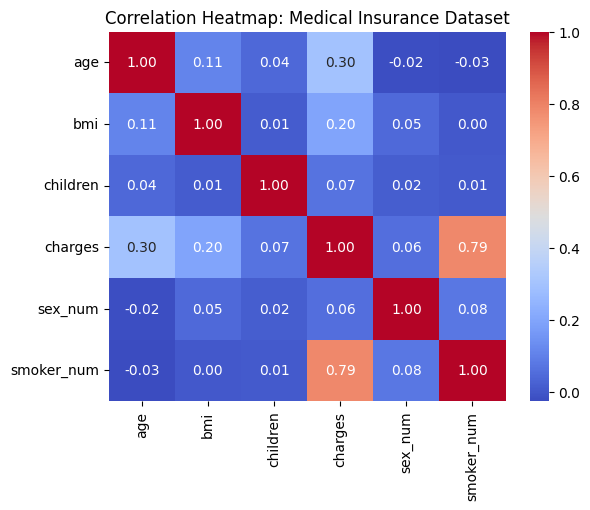

In [16]:
corr = data[heatmap_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Medical Insurance Dataset")
plt.show()


Correlation analysis shows smoking status has the strongest relationship with medical insurance charges (r ≈ 0.79), far outweighing age, BMI, and demographic factors.